In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from itertools import combinations


In [2]:
df = pd.read_csv('diabetes.txt',delimiter = "\t")
print(df.shape)
df

(442, 11)


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


### Preliminary data analys

In [3]:
print(f'Features: {df.columns} \n')
print(f'The data has {df.isnull().sum().sum()} absent values \n')
sex = df['SEX']
age = df['AGE']
men, women = 0 ,0 
men_mean_age, women_mean_age = 0, 0

for x in range(len(sex)):
    if sex[x]== 1: 
        men+=1
        men_mean_age+= age[x]
    elif sex[x] == 2:
        women+=1
        women_mean_age += age[x]
        
print(f'The number of women is {women} and the number of men is {men}\n')
print(f'The average age of women in the experiment is {women_mean_age / women} and the average age of men is {men_mean_age / men}')
sorteddf = df.sort_values('SEX')

Features: Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object') 

The data has 0 absent values 

The number of women is 207 and the number of men is 235

The average age of women in the experiment is 50.94202898550725 and the average age of men is 46.38297872340426


### Blood Pressure Analysys by age

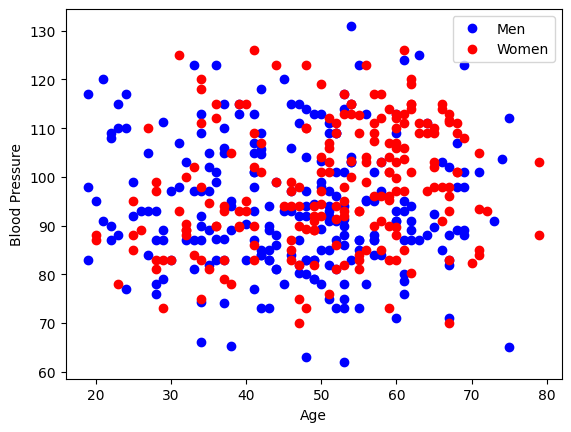

In [4]:
sorted_df = df.sort_values('SEX')
plt.ylabel('Blood Pressure')
plt.xlabel('Age')
plt.plot(sorted_df['AGE'][0:235], df['BP'][0:235], 'bo')
plt.plot(sorted_df['AGE'][235:], sorted_df['BP'][235:], 'ro')
plt.legend(['Men', 'Women'])


### TSNE dimentional reduction

In [5]:
X, y = df.to_numpy()[:, :-1], df.to_numpy()[:, -1:]
np.random.seed(100) 
subsample_idc = np.random.choice(X.shape[0],400,replace = False)
X_TSNE = X[subsample_idc, :]
y_TSNE = y[subsample_idc]



(442, 11)


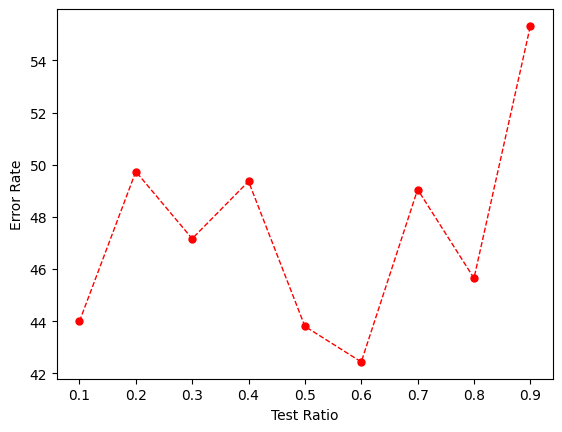

In [6]:
ratios = np.arange(0.1,1,0.1)
print(df.shape)
estimator = LinearRegression()
X, y = df.to_numpy()[:, :-1], df.to_numpy()[:, -1:]
result =[]
for r in ratios:
    sc = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = r)
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    error_rate = mean_absolute_error(y_test, y_pred)
    result.append(error_rate)
plt.ylabel("Error Rate")
plt.xlabel("Test Ratio")
plt.plot(ratios, result,color='red', marker='o', linestyle='dashed',
     linewidth=1, markersize=5)


## Naive k-features selection algorithm

In [13]:
def k_features(train_set, test_set, k):
    min_absolute_error = 2**16 
    features = []
    X_train, X_test = train_set
    y_train, y_test = test_set
    for combination in combinations(np.arange(0, len(X_train[0]),1), k):
        X_train_k = X_train[:, [list(combination)]]
        X_test_k = X_test[:, [list(combination)]]
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        if mae < min_absolute_error:
            min_absolute_error = mae
            features = combination
    features = list(df.columns[list(combination)])
    print(f'The minimum absolute value is {min_absolute_error} with the features {features}')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
train_set = (X_train, X_test)
test_set = (y_train, y_test)
k_features(train_set, test_set,2)

The minimum absolute value is 42.14363364189773 with the features ['S5', 'S6']
